# PDF Power Hacks: Everything You Didn’t Know You Could Do with Python and Your PDF Files  
🛡️ DIY in AI: Protect your data. Don’t upload it anywhere.  
🐍 **Python | Scan Multiple Images into One PDF** 🖼️➡️📄  

## ❓Got a stack of scanned images you need to share as a single file? 🙃  
With Python, you can turn them into a polished PDF locally — no upload, no risk.

## 👉 Solution  
📸 Merge multiple image scans into a single PDF document.  
🛡️ 100% local — no data leaves your machine.

## 🔧 How does it work?  
🖼️ Create 3 synthetic images (e.g. receipts, notes, agendas) using PIL  
🎨 Add color-coded circular icons and custom text to each image  
📂 Save all files locally and validate existence  
📄 Insert them as centered, scaled A4 pages in a new PDF using reportlab  
🧼 Auto-delete temp images and show visual preview using matplotlib

## 🔎 Why does it matter?  
📚 Makes document archiving and sharing easy  
🔐 Ensures full control over sensitive information  
🧠 Enables AI/NLP-ready processing with predictable formatting

## ✨ Real-world example:  
📝 Page 1: receipt | Page 2: handwritten notes | Page 3: meeting agenda  
📥 Combine them into a clean, readable, locally stored PDF  
📈 Ready for OCR, machine learning pipelines, or just organized backups

## ⚙️ Business impact:  
🗃️ Streamlines document digitization  
📨 Reduces friction in information flow  
🔍 Keeps everything offline and auditable

🔗 [GitHub](https://github.com/jcombari/AI-For-Unstructured-Data/tree/main/PDF%20Power%20Hacks)

## 💭 Thought  
Would you trust the cloud with your scanned data? Or is a local, automated solution like this a better fit?

🔑 #Python #PyPDF2 #DataScience #PDFprocessing #Automation #AI #DataPrivacy #NLP #MachineLearning #TechForGood  
🔁 If you found this useful, share it with your network.  
⚠️ Please don’t repost as your own. Respect the original work.

---

# PDF Power Hacks: Todo lo que no sabías que podías hacer con Python y tus archivos PDF  
🛡️ DIY en IA: Cuida tus datos. No los subas a ningún sitio.  
🐍 **Python | Escanea múltiples imágenes a un solo PDF** 🖼️➡️📄  

## ❓ ¿Tienes varias imágenes escaneadas que necesitas enviar como un solo archivo? 🙃  
Con Python, puedes crear un PDF ordenado, local y seguro.

## 👉 Solución  
📸 Creamos 3 imágenes sintéticas tipo escaneo: tickets, notas, actas  
🎨 Agregamos íconos circulares por color y texto personalizado con PIL  
📂 Guardamos localmente y verificamos cada archivo  
📄 Usamos reportlab para crear un PDF con las imágenes centradas en tamaño A4  
🧼 Eliminamos las temporales y mostramos las imágenes con matplotlib

## 🔎 ¿Por qué importa?  
📚 Facilita el archivo de documentos físicos  
🔐 Control total sobre la información privada  
🧠 Formato limpio y consistente para OCR y NLP

## ✨ Caso práctico:  
📝 Página 1: recibo | Página 2: apuntes | Página 3: acta  
📥 Todo en un solo PDF, organizado y listo para guardar o analizar  
📈 Ideal para procesos automatizados de IA o respaldo digital seguro

## ⚙️ Impacto en el negocio:  
🗃️ Mejora el flujo de trabajo documental  
📨 Disminuye tiempos de gestión manual  
🔍 Privacidad total y cero dependencia de la nube

🔗 [Repositorio en GitHub](https://github.com/jcombari/AI-For-Unstructured-Data/tree/main/PDF%20Power%20Hacks)

## 💭 Reflexión:  
¿Confiarías tus documentos escaneados a la nube? ¿O prefieres una solución local y automática como esta?

🔑 #Python #PyPDF2 #CienciaDeDatos #Automatización #PDFprocessing #PrivacidadDeDatos #IA #NLP #MachineLearning #TechForGood  
🔁 Si te pareció útil, compártelo con tu red.  
⚠️ Por favor, no lo publiques como propio. Respeta el trabajo original.


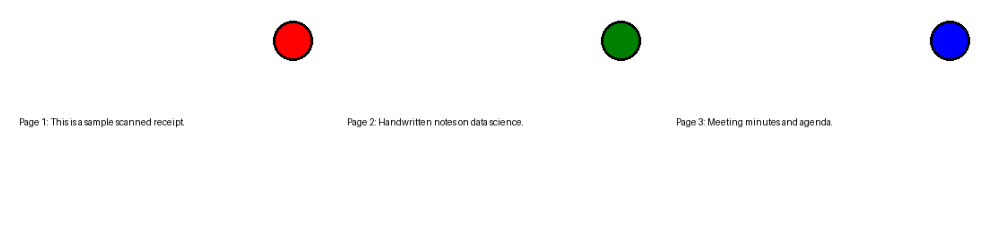

In [1]:
import os
from PIL import Image, ImageDraw, ImageFont
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
import matplotlib.pyplot as plt

# 🛠 Configuración
prefix = "20250620_"
directory = f"{prefix}images"

# Crear directorio si no existe
os.makedirs(directory, exist_ok=True)

# 🖼️ Textos y colores
texts = [
    "Page 1: This is a sample scanned receipt.",
    "Page 2: Handwritten notes on data science.",
    "Page 3: Meeting minutes and agenda."
]
icon_colors = ["red", "green", "blue"]
image_list = []

# 🔘 Función para crear un ícono circular
def create_icon(color, size=50):
    img = Image.new("RGBA", (size, size), (0, 0, 0, 0))
    draw = ImageDraw.Draw(img)
    draw.ellipse((3, 3, size - 3, size - 3), fill=color, outline="black", width=3)
    return img

# 🖼️ Generar imágenes
for i, text in enumerate(texts):
    # Imagen base blanca
    img = Image.new("RGB", (350, 250), "white")
    draw = ImageDraw.Draw(img)

    # Fuente: puedes personalizar
    font = ImageFont.load_default()
    draw.text((10, 120), text, fill="black", font=font)

    # Crear ícono
    icon = create_icon(icon_colors[i], 50)

    # Pegar ícono
    img.paste(icon, (290, 10), icon)

    # Guardar imagen
    filename = os.path.join(directory, f"{prefix}image_{i + 1}.png")
    img.save(filename)
    image_list.append(filename)

# 🧾 Verificar imágenes
if not image_list:
    raise FileNotFoundError(f"No PNG images with prefix '{prefix}' found in '{directory}'.")

# 📄 Crear PDF (centrado en A4)
pdf_filename = os.path.join(directory, f"{prefix}combined_output.pdf")
c = canvas.Canvas(pdf_filename, pagesize=A4)
a4_w, a4_h = A4  # en puntos (1 punto = 1/72 pulgada)

for img_path in image_list:
    img = Image.open(img_path)
    img_w, img_h = img.size

    # Calcular escala para ajustar a A4
    scale = min(a4_w / img_w, a4_h / img_h)
    new_w = img_w * scale
    new_h = img_h * scale

    x = (a4_w - new_w) / 2
    y = (a4_h - new_h) / 2
    img = img.resize((int(new_w), int(new_h)))
    
    img_temp_path = img_path.replace(".png", "_scaled.png")
    img.save(img_temp_path)
    c.drawImage(img_temp_path, x, y, width=new_w, height=new_h)
    os.remove(img_temp_path)  # eliminar imagen temporal
    c.showPage()

c.save()

# 📊 Mostrar imágenes lado a lado
fig, axes = plt.subplots(1, len(image_list), figsize=(10, 4))
for ax, img_path in zip(axes, image_list):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()
